# Final Report 

This is the final draft of our research and the models we found from the data we gathered.

## General Premier League Dataset

This data below works with the general premier league dataset from fbref, in which we look at the highest correlation values between the different features in the dataset and the amount of points received. 

Data loaded successfully!
   Unnamed: 0            Squad  Country  LgRk  MP   W   D   L  GF  GA  GD  \
0           0        Liverpool  eng ENG     1  38  25   9   4  86  41  45   
1           1          Arsenal  eng ENG     2  38  20  14   4  69  34  35   
2           2  Manchester City  eng ENG     3  38  21   8   9  72  44  28   
3           3          Chelsea  eng ENG     4  38  20   9   9  64  43  21   
4           4    Newcastle Utd  eng ENG     5  38  20   6  12  68  47  21   

   Pts  Pts/MP    xG   xGA   xGD  xGD/90  Attendance      Top Team Scorer  \
0   84    2.21  82.2  38.6  43.6    1.15       60324   Mohamed Salah - 29   
1   74    1.95  59.9  34.4  25.5    0.67       60251      Kai Havertz - 9   
2   71    1.87  68.1  47.7  20.4    0.54       52756  Erling Haaland - 22   
3   69    1.82  67.8  47.3  20.5    0.54       39672     Cole Palmer - 15   
4   66    1.74  63.8  45.5  18.3    0.48       52187  Alexander Isak - 23   

       Goalkeeper  
0         Alisson  
1      D

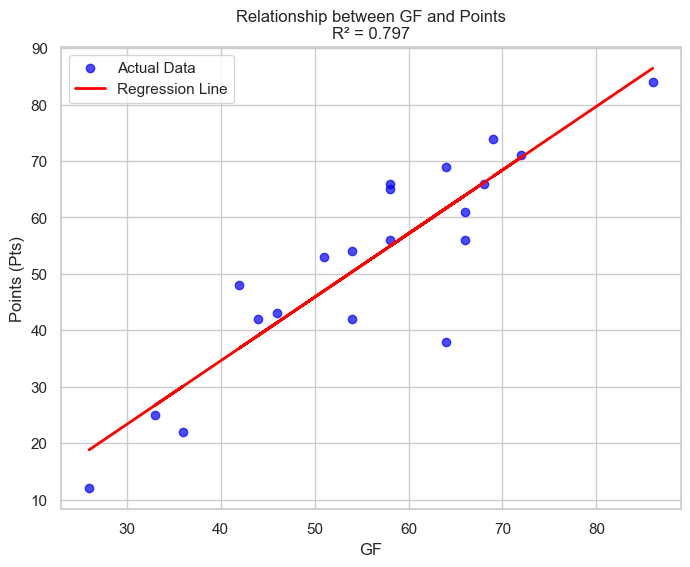

GF: R² = 0.797


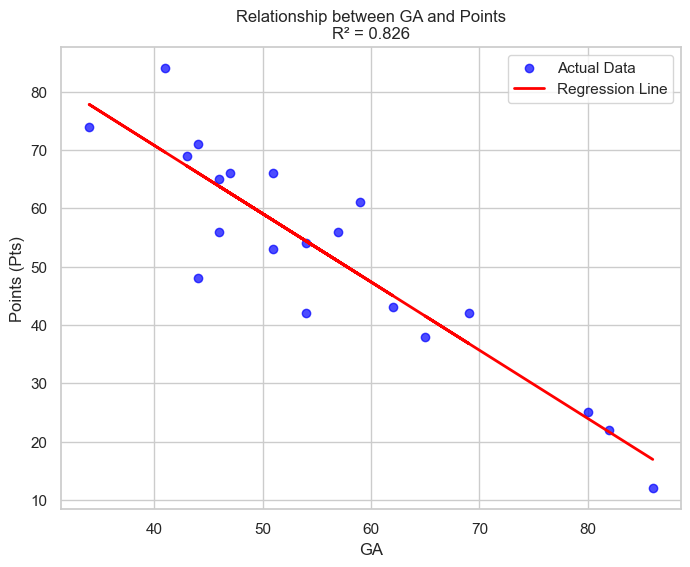

GA: R² = 0.826


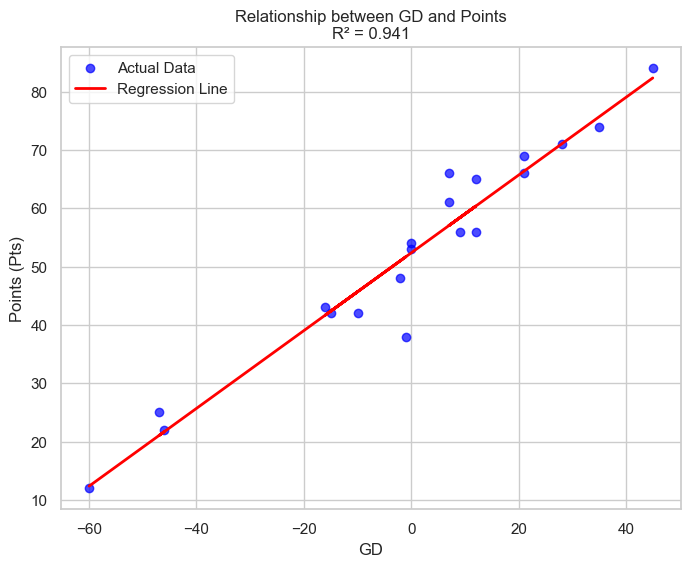

GD: R² = 0.941


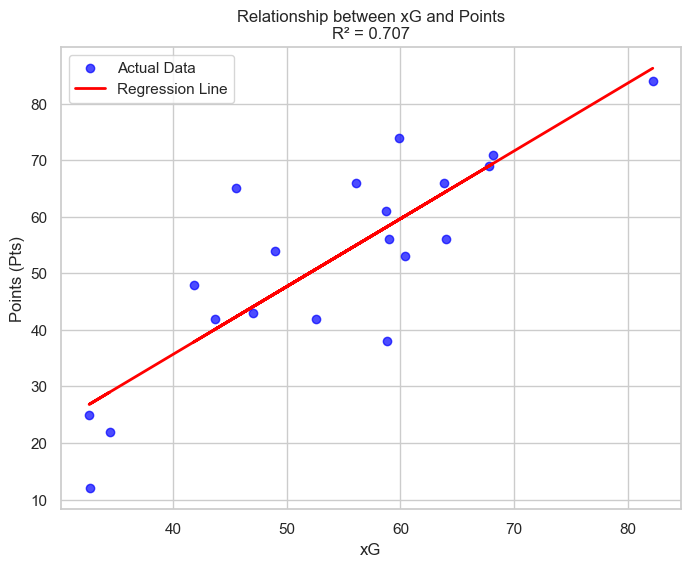

xG: R² = 0.707


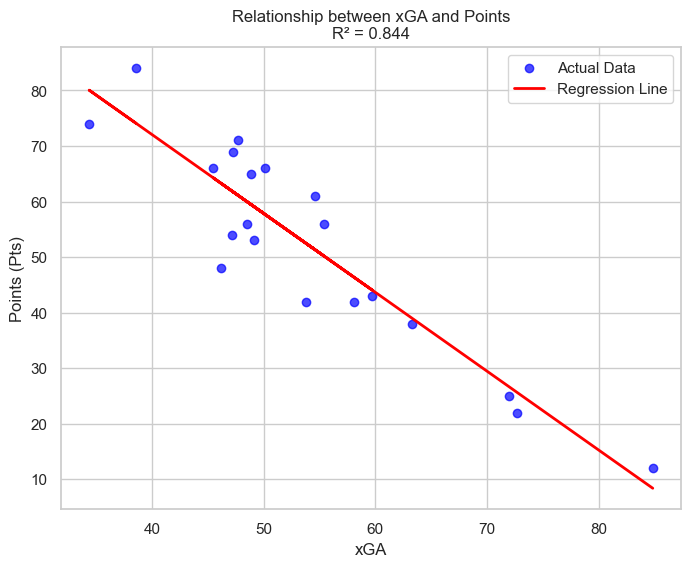

xGA: R² = 0.844


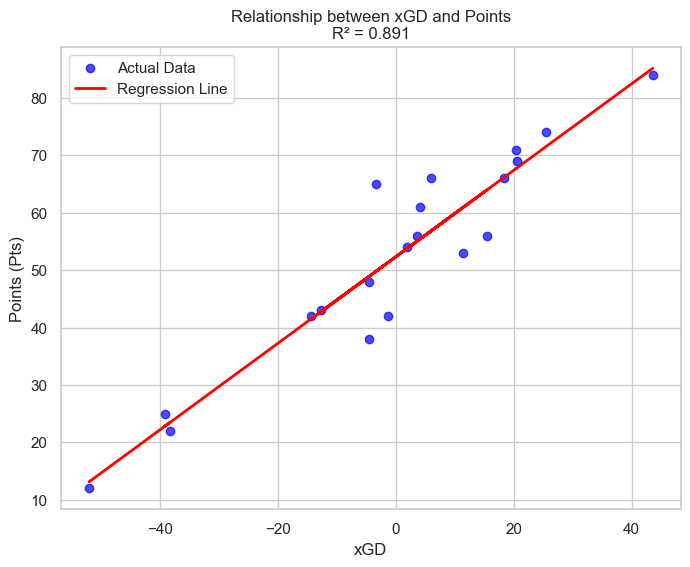

xGD: R² = 0.891


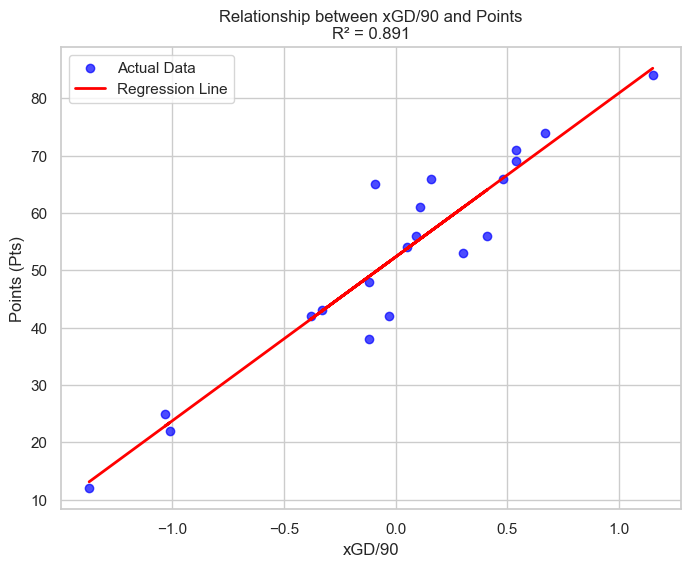

xGD/90: R² = 0.891


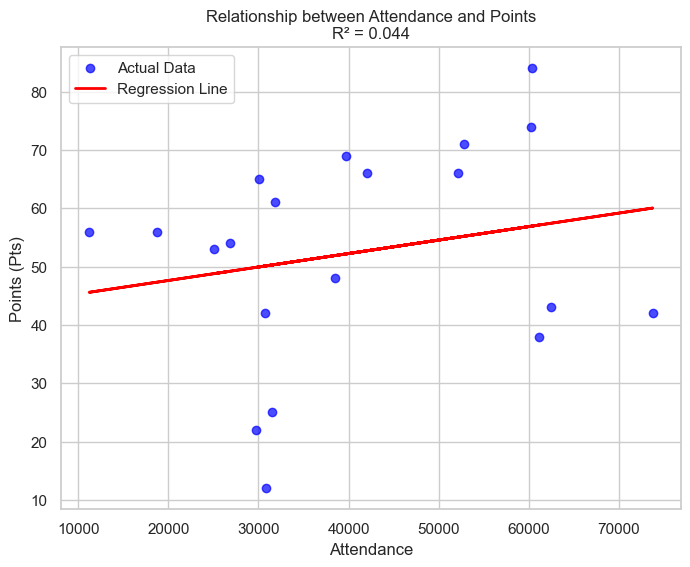

Attendance: R² = 0.044

Features ranked by their correlation with Points:
GD: 0.941
xGD/90: 0.891
xGD: 0.891
xGA: 0.844
GA: 0.826
GF: 0.797
xG: 0.707
Attendance: 0.044

Running multiple regression analysis...

Multiple Regression Coefficients:
      Feature  Coefficient  Absolute_Coefficient
6      xGD/90  1114.015212           1114.015212
5         xGD   -15.934431             15.934431
3          xG   -13.666146             13.666146
4         xGA    13.320825             13.320825
2          GD     0.524564              0.524564
0          GF     0.323592              0.323592
1          GA    -0.200972              0.200972
7  Attendance    -0.000096              0.000096

Overall Model R²: 0.966


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set up visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load the data from CSV file
# (Make sure the CSV file is in the same directory as your notebook)
try:
    df = pd.read_csv('full-premier-dataset.csv')  # Update with your actual filename
    print("Data loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure:")
    print("1. The CSV file exists in your current working directory")
    print("2. You've specified the correct filename")
    print("3. The file has the correct data format (matching your table)")
except Exception as e:
    print(f"An error occurred while loading the file: {str(e)}")

# 2. Data Cleaning (if needed)
# Ensure column names match exactly what's in your CSV
# If your CSV has different column names, adjust them here:
column_mapping = {
    'GF': 'GF',
    'GA': 'GA',
    'GD': 'GD',
    'Pts': 'Pts',
    'xG': 'xG',
    'xGA': 'xGA',
    'xGD': 'xGD',
    'xGD/90': 'xGD/90',
    'Attendance': 'Attendance'
}

df = df.rename(columns=column_mapping)


# 3. Define function to evaluate each feature's relationship with Points
def evaluate_feature(df, feature, target='Pts'):
    """
    Evaluates the linear relationship between a feature and points.
    Returns R-squared value and shows a regression plot.
    """
    X = df[[feature]].values
    y = df[target].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Points (Pts)')
    plt.title(f'Relationship between {feature} and Points\nR² = {r2:.3f}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return r2

# 4. Evaluate all features
features_to_evaluate = ['GF', 'GA', 'GD', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']
r2_results = {}

for feature in features_to_evaluate:
    try:
        r2 = evaluate_feature(df, feature)
        r2_results[feature] = r2
        print(f"{feature}: R² = {r2:.3f}")
    except KeyError:
        print(f"Warning: Column '{feature}' not found in dataset. Skipping...")


print("\nFeatures ranked by their correlation with Points:")
sorted_results = sorted(r2_results.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, r2 in sorted_results:
    print(f"{feature}: {r2:.3f}")


print("\nRunning multiple regression analysis...")
try:
    # Select only numeric features that exist in the dataframe
    available_features = [f for f in features_to_evaluate if f in df.columns]
    X = df[available_features]
    y = df['Pts']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Create a DataFrame with feature coefficients
    coefficients = pd.DataFrame({
        'Feature': available_features,
        'Coefficient': model.coef_,
        'Absolute_Coefficient': np.abs(model.coef_)
    }).sort_values('Absolute_Coefficient', ascending=False)
    
    print("\nMultiple Regression Coefficients:")
    print(coefficients)
    
    # Calculate and print overall model performance
    y_pred = model.predict(X)
    overall_r2 = r2_score(y, y_pred)
    print(f"\nOverall Model R²: {overall_r2:.3f}")
    
except Exception as e:
    print(f"Error in multiple regression: {str(e)}")

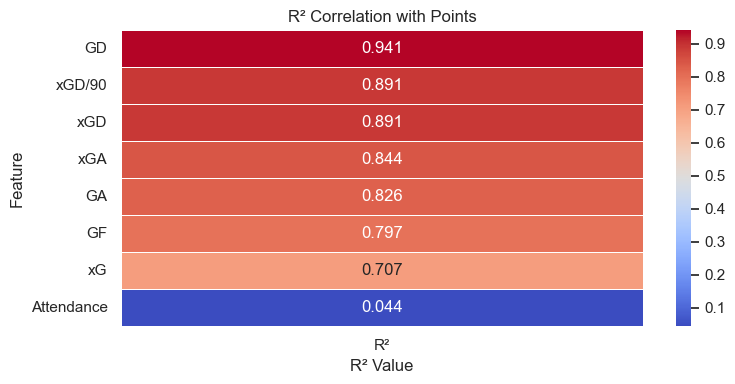

In [2]:
r2_df = pd.DataFrame.from_dict(r2_results, orient='index', columns=['R²'])
r2_df = r2_df.sort_values('R²', ascending=False)

plt.figure(figsize=(8, len(r2_df) * 0.5))
sns.heatmap(r2_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f")
plt.title('R² Correlation with Points')
plt.xlabel('R² Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Squad Standard Stats Dataset

The dataset below that was used was the squad standards dataset from fbref, which takes in a deeper look into the team stats that are not as obvious to people looking outside in and provide a unqiue approach and look to what other variables can influence a teams performance and their placement in the premier league. 

Data loaded successfully!
         Squad  Pts  # Pl   Age  Poss  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  \
0      Arsenal   74    25  25.8  56.9   67   55  122    65   2      2    70   
1  Aston Villa   66    28  27.0  50.5   56   45  101    53   3      6    76   
2  Bournemouth   56    29  25.1  48.5   57   41   98    51   6      7    97   
3    Brentford   56    28  25.8  47.9   65   44  109    60   5      6    62   
4     Brighton   61    32  24.8  52.3   64   41  105    57   7      7    78   

   CrdR    xG  npxG   xAG  npxG+xAG  PrgC  PrgP  
0     6  59.9  58.4  45.3     103.6   852  1826  
1     4  56.1  51.3  41.7      93.0   720  1344  
2     3  64.0  58.5  43.8     102.3   754  1489  
3     1  59.0  54.4  42.4      96.8   598  1356  
4     3  58.7  53.3  40.4      93.7   816  1539  


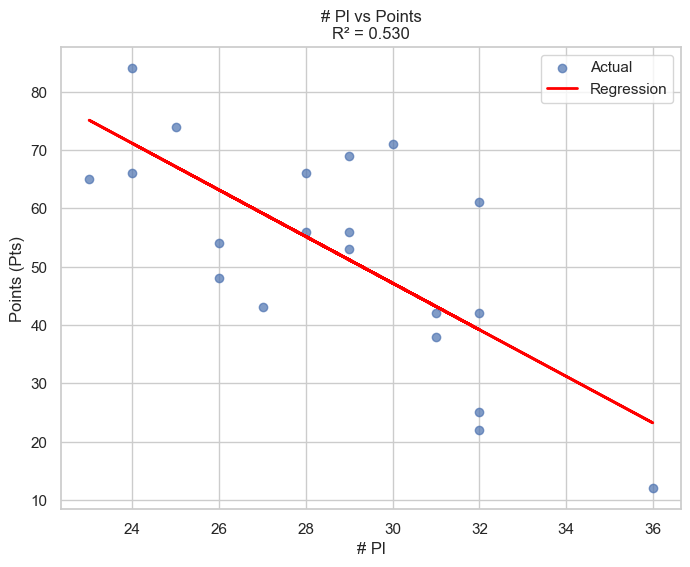

# Pl: R² = 0.530


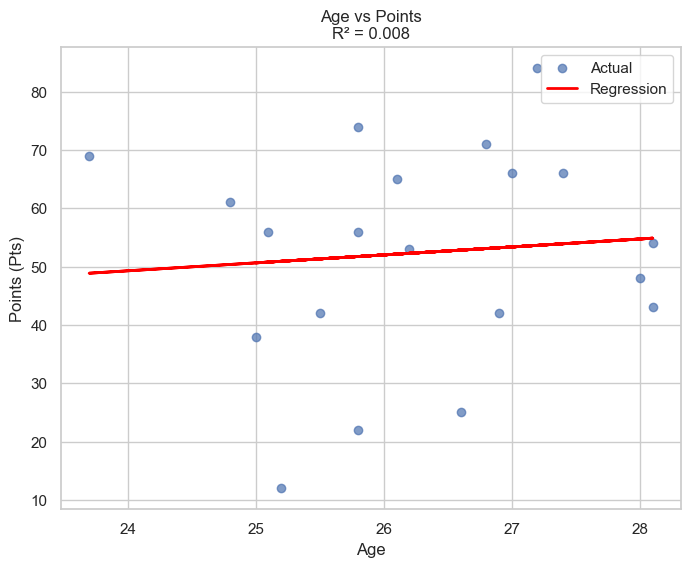

Age: R² = 0.008


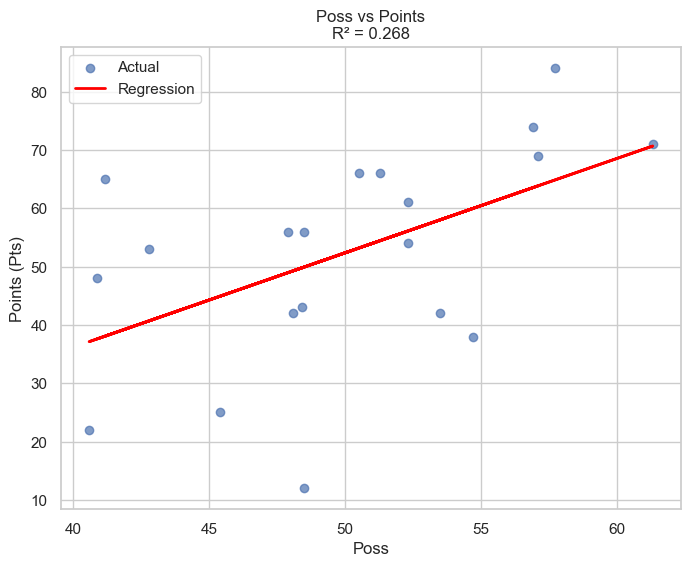

Poss: R² = 0.268


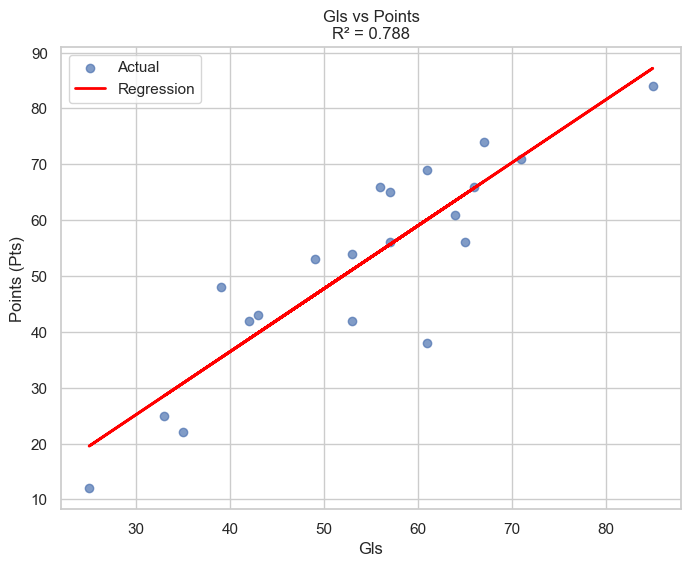

Gls: R² = 0.788


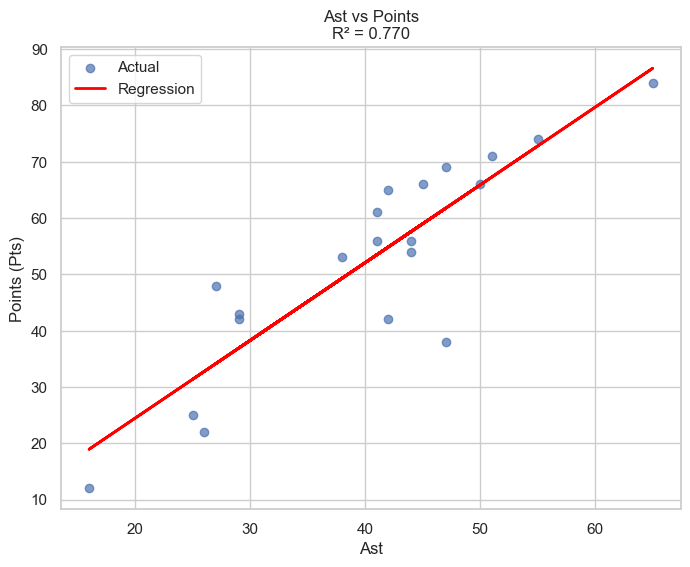

Ast: R² = 0.770


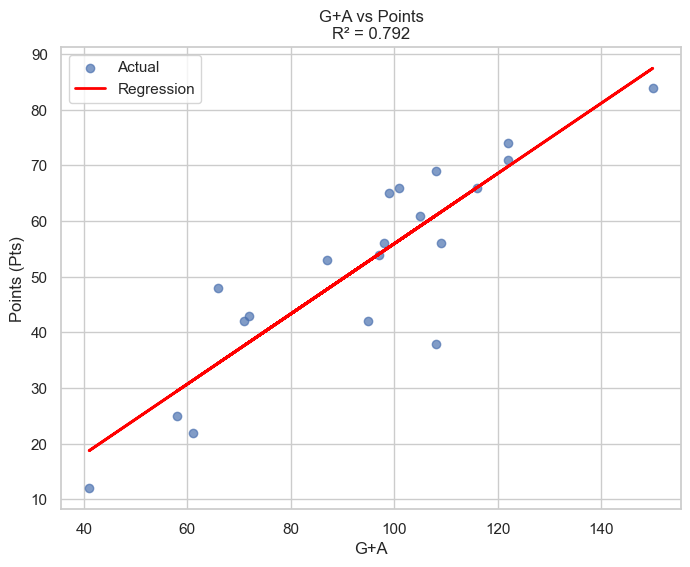

G+A: R² = 0.792


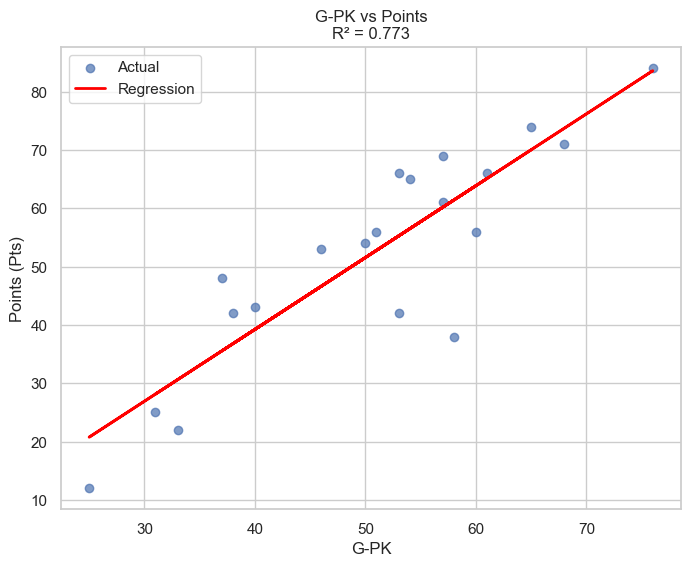

G-PK: R² = 0.773


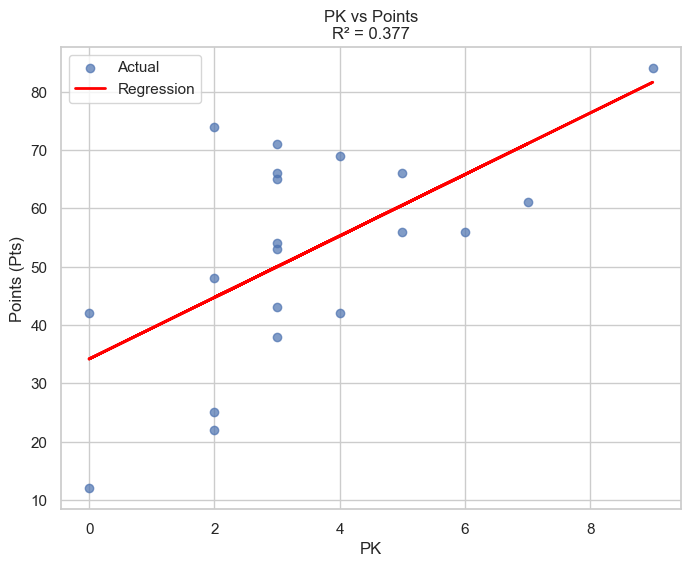

PK: R² = 0.377


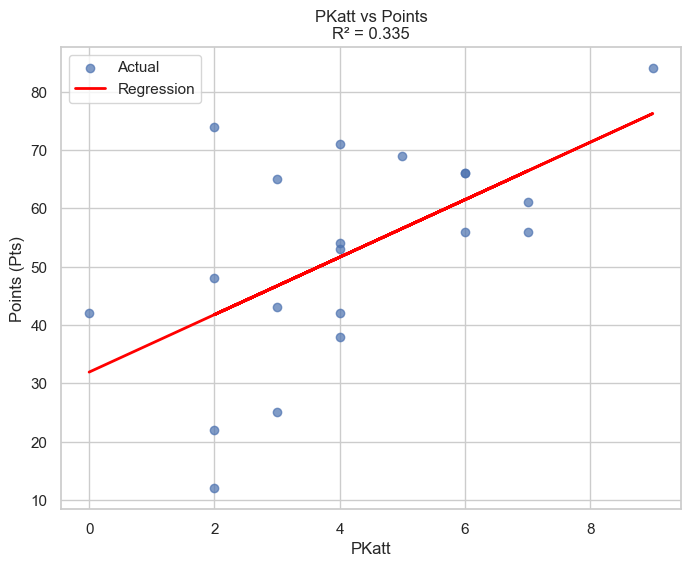

PKatt: R² = 0.335


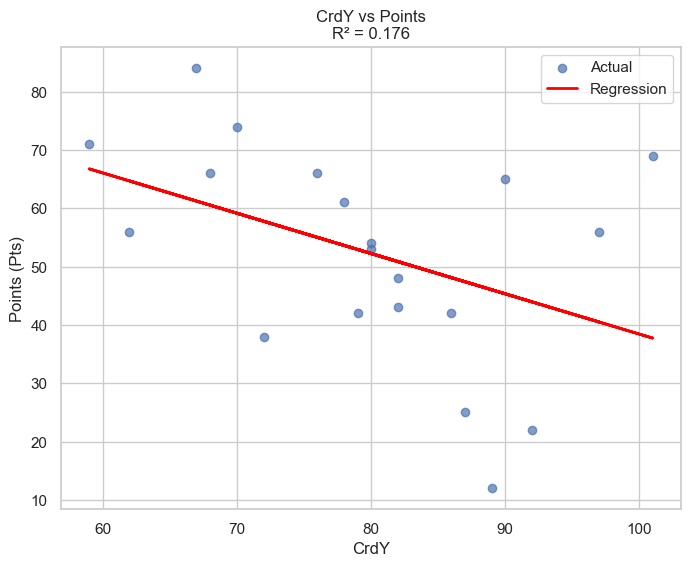

CrdY: R² = 0.176


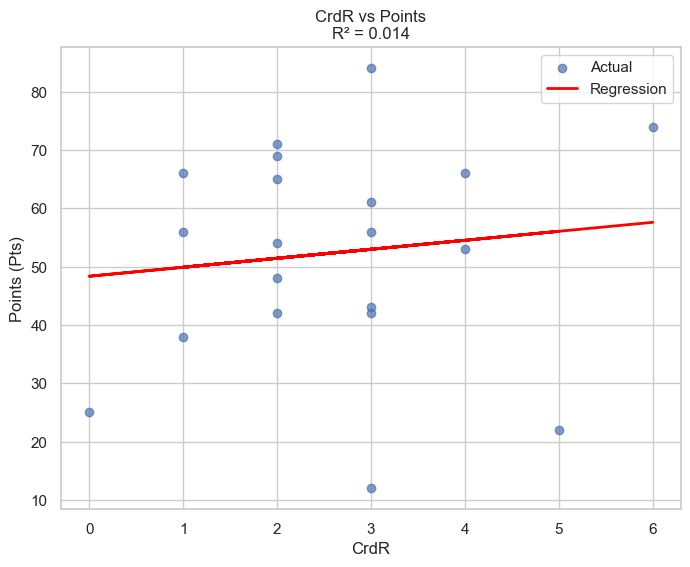

CrdR: R² = 0.014


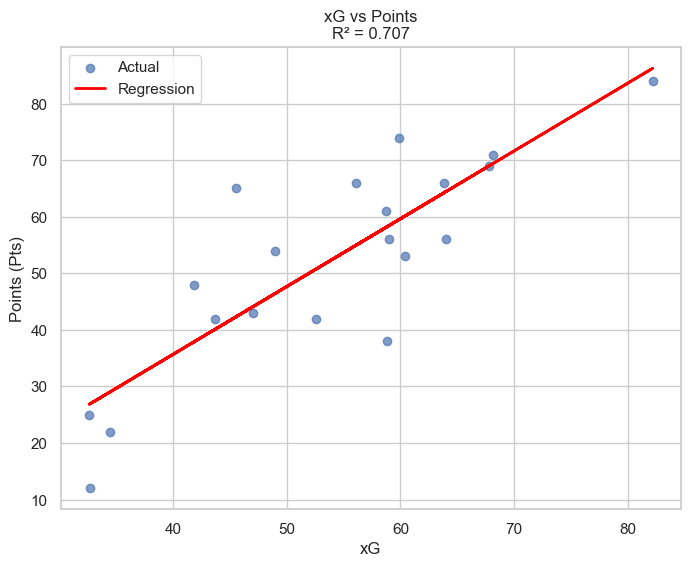

xG: R² = 0.707


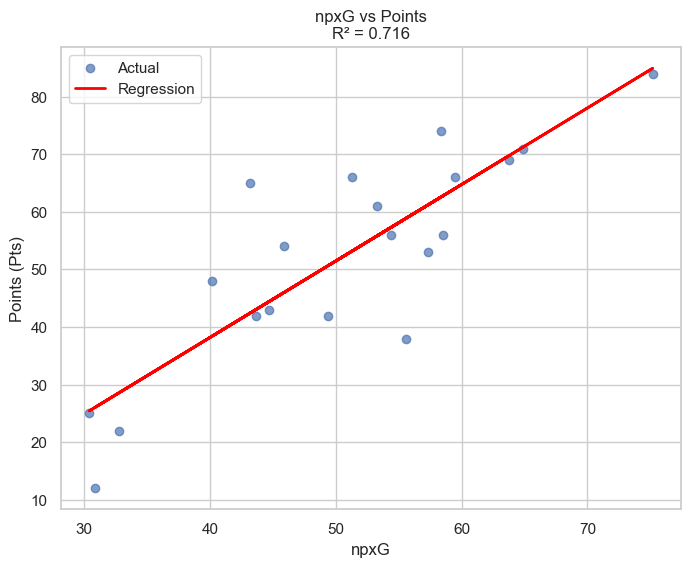

npxG: R² = 0.716


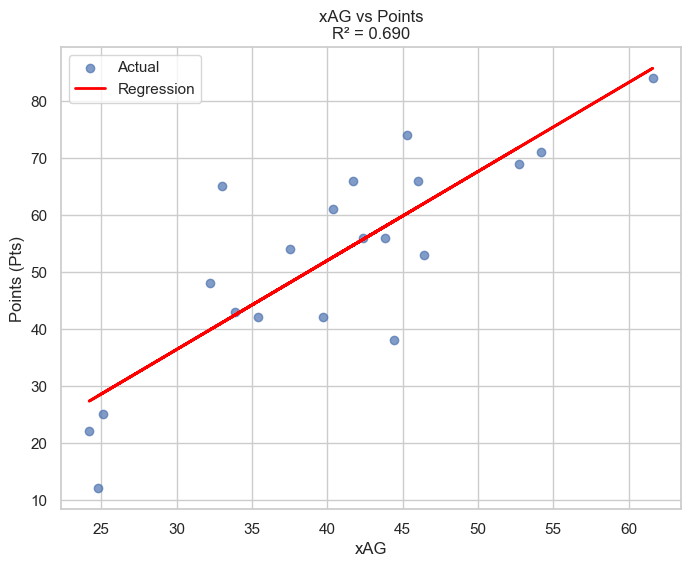

xAG: R² = 0.690


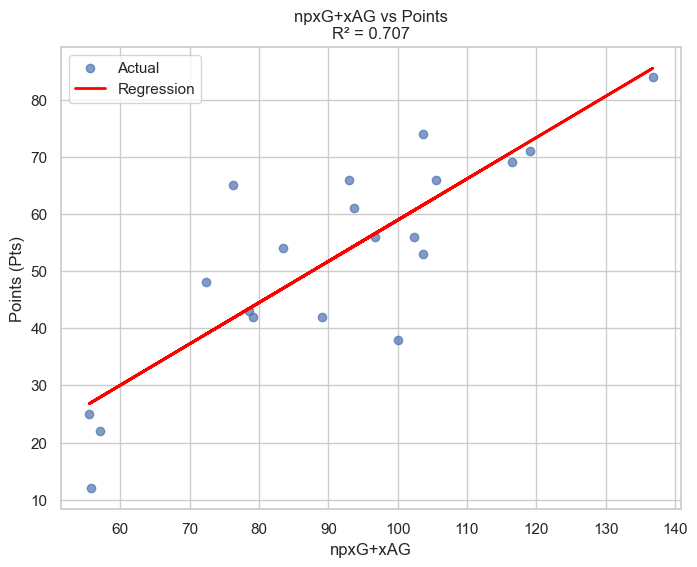

npxG+xAG: R² = 0.707


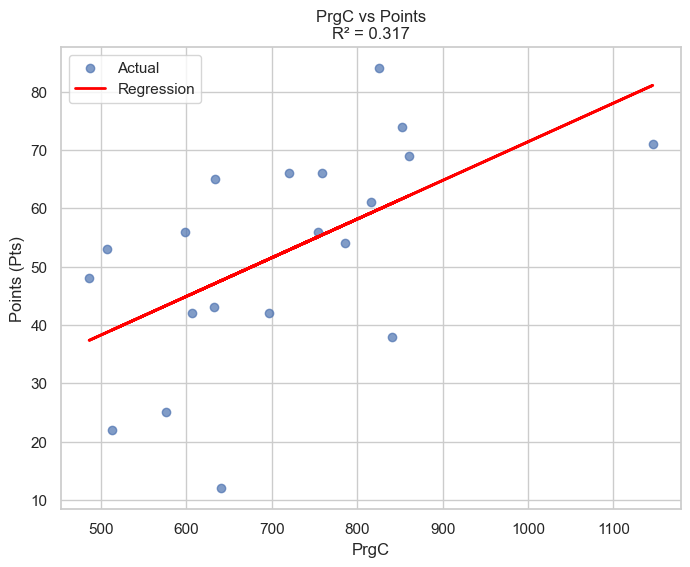

PrgC: R² = 0.317


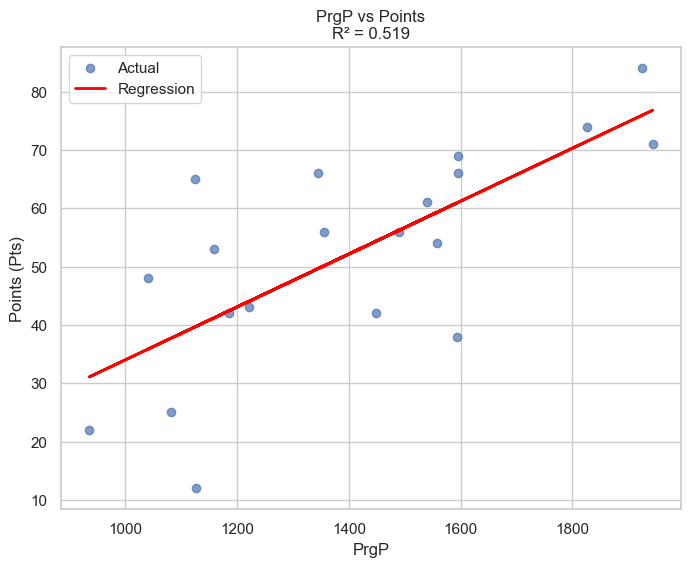

PrgP: R² = 0.519

Features ranked by correlation with Points:
G+A: 0.792
Gls: 0.788
G-PK: 0.773
Ast: 0.770
npxG: 0.716
npxG+xAG: 0.707
xG: 0.707
xAG: 0.690
# Pl: 0.530
PrgP: 0.519
PK: 0.377
PKatt: 0.335
PrgC: 0.317
Poss: 0.268
CrdY: 0.176
CrdR: 0.014
Age: 0.008

Running multiple regression analysis...

Multiple Regression Coefficients:
     Feature  Coefficient  Absolute_Coefficient
12      npxG   154.161609            154.161609
13       xAG   134.605153            134.605153
14  npxG+xAG  -129.450933            129.450933
8      PKatt    29.881678             29.881678
11        xG   -29.037664             29.037664
6       G-PK     5.300507              5.300507
7         PK    -4.802295              4.802295
10      CrdR     3.842421              3.842421
1        Age     2.640082              2.640082
4        Ast    -2.091655              2.091655
0       # Pl    -1.658198              1.658198
5        G+A    -1.593443              1.593443
9       CrdY     0.959308             

In [3]:
# Set up visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load the data
try:
    df = pd.read_csv('NewPremierLeagueSquadData.csv')
    print("Data loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the filename and path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

# 2. Define the columns to evaluate (as specified)
features_to_evaluate = [
    '# Pl', 'Age', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
    'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP'
]

# 3. Function to evaluate each feature
def evaluate_feature(df, feature, target='Pts'):
    X = df[[feature]].values
    y = df[target].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label='Actual')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression')
    plt.xlabel(feature)
    plt.ylabel('Points (Pts)')
    plt.title(f'{feature} vs Points\nR² = {r2:.3f}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return r2

# 4. Evaluate and collect R² values
r2_results = {}
for feature in features_to_evaluate:
    if feature in df.columns:
        try:
            r2 = evaluate_feature(df, feature)
            r2_results[feature] = r2
            print(f"{feature}: R² = {r2:.3f}")
        except Exception as e:
            print(f"Error evaluating {feature}: {str(e)}")
    else:
        print(f"Warning: Column '{feature}' not found in dataset.")

# 5. Rank features by R²
print("\nFeatures ranked by correlation with Points:")
sorted_results = sorted(r2_results.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, r2 in sorted_results:
    print(f"{feature}: {r2:.3f}")

# 6. Multiple regression analysis
print("\nRunning multiple regression analysis...")
try:
    available_features = [f for f in features_to_evaluate if f in df.columns]
    X = df[available_features]
    y = df['Pts']

    model = LinearRegression()
    model.fit(X, y)

    coefficients = pd.DataFrame({
        'Feature': available_features,
        'Coefficient': model.coef_,
        'Absolute_Coefficient': np.abs(model.coef_)
    }).sort_values('Absolute_Coefficient', ascending=False)

    print("\nMultiple Regression Coefficients:")
    print(coefficients)

    y_pred = model.predict(X)
    overall_r2 = r2_score(y, y_pred)
    print(f"\nOverall Model R²: {overall_r2:.3f}")

except Exception as e:
    print(f"Error in multiple regression: {str(e)}")

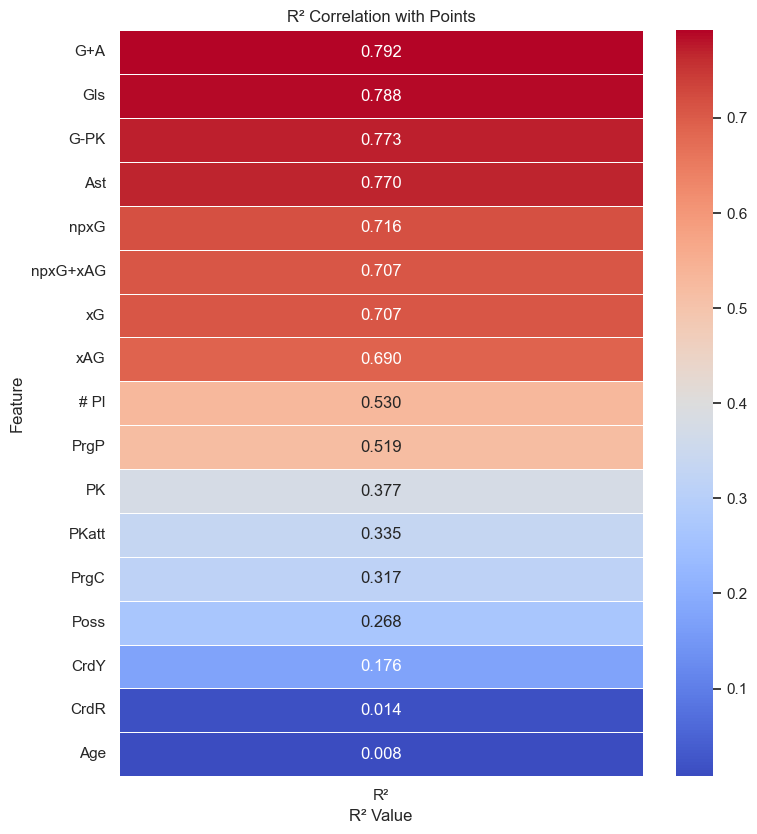

In [4]:
r2_df = pd.DataFrame.from_dict(r2_results, orient='index', columns=['R²'])
r2_df = r2_df.sort_values('R²', ascending=False)

plt.figure(figsize=(8, len(r2_df) * 0.5))
sns.heatmap(r2_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f")
plt.title('R² Correlation with Points')
plt.xlabel('R² Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()